PROYECTO: ¿CUANTOS HABITANTES HAY EN TU DEPARTAMENTO?

Al analizar el comportamiento de los habitantes de un departamento segun diferentes variables, encontre el que pib de un departamento influye bastantes en la cantidad de habitantes que puede haber en un departamento y que ademas la grafica se asemeja a una funcion radical. basandome en esto diseñe midelo aplicando la raiz cuadrada al pib multiplicando por 10000 como un parametro que me dice cuanto aumenta en promedio la poblacion cada que aumenta el pib.

In [60]:
import pandas as pd
import matplotlib.pyplot as plt
data = pd.read_excel("/content/drive/MyDrive/departamentos.xlsx")

In [61]:
pd.options.plotting.backend = "plotly"
departamentos.plot(x="PIB", y="POBLACION TOTAL", kind = "line")

In [4]:
#cojunto de prueba: departamentos del cesar y cauca
#variables
cesar_PIB = 23_037 
cauca_PIB = 21_017

habitantes_cesar = int((cesar_PIB**0.5)*10000) #parametro:promedio de aumento de la poblacion segun el PIB
habitantes_cauca = int((cauca_PIB**0.5)*10000)

print(f"la cantidad de habitantes de los departamento del cesar y cauca son: {habitantes_cesar} y {habitantes_cauca}")
print("la cantidad exacta de habitantes es de: 1_341_697 y 1_516_018")

la cantidad de habitantes de los departamento del cesar y cauca son: 1517794 y 1449724
la cantidad exacta de habitantes es de: 1_341_697 y 1_516_018


Basandome en la grafica de arriba, escogi como conjunto de prueba el cesar y el cauca para poder crear mi modelo y estimando que la cantidad de personas aumenta en 10_000 cada vez que la raiz cuadrada del pib aumenta en 10. los resultados con este conjunto fueron cercanos a los valores exactos.

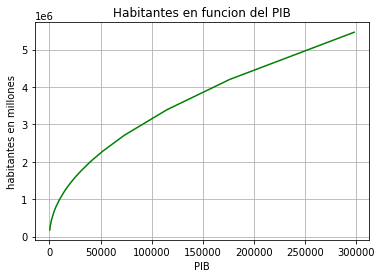

In [94]:

PIB = departamentos["PIB"].to_list()
Habitantes = [departamento_hab(i) for i in PIB]

plt.plot(PIB , Habitantes, color="g")
plt.title("Habitantes en funcion del PIB")
plt.xlabel("PIB")
plt.ylabel("habitantes en millones")
plt.grid()

plt.show()

Viendo este grafico podemos darnos cuenta que el modelo tiene limites en cuanto a la cantidad de habitantes que puede predecir, ademas de la exactitud del modelo.
En la grafica de la poblacion total que hay mas arrriba, la poblacion fluctual al principio y ademas el punto maximo de la poblacion llega hasta casi los 9 millones de habitantes. En cambio en la graifica del modelo podemos ver que se mantiene una curva y el limite es hasta casi los 6 millones.

**CONTRUCCION DE LA FUNCION**

In [70]:
#variable: PIB
#paramentro: 10_000(aumento de poblacion por cada)
def departamento_hab(PIB):
  habitantes = (PIB**0.5)*10000
  return habitantes

print(int(departamento_hab(int(input("ingrese el PIB: ")))))

ingrese el PIB: 23037
1517794


**COMPARATIVA DE LOS HABITANTES EXACTOS Y EN FUNCION DEL PIB**

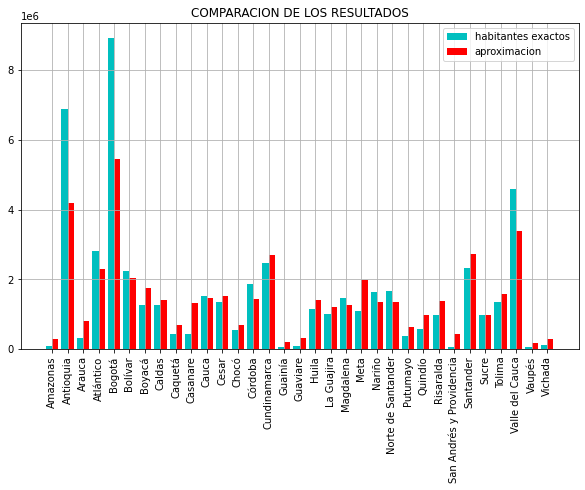

In [101]:
import numpy as np

plt.figure(figsize=(10,6))
width = 0.4
n = len(departamento)
x = np.arange(n)
departamento = data["Departamentos"].to_list()
habitantes= data["POBLACION TOTAL"].to_list()
habitantes_modelo = [departamento_hab(i) for i in data["PIB"].to_list()]

#comparativa resultados del modelo y los habitantes

plt.bar(x - width/2, habitantes, width=width, label='habitantes exactos',
        color="c")
plt.bar(x + width/2, habitantes_modelo, width=width, label='aproximacion',
        color ="r")
plt.title("COMPARACION DE LOS RESULTADOS")
plt.xticks(x, departamento, rotation=90)
plt.legend()
plt.grid()
plt.show()

Analizando la grafica comparativa podemos decir que el modelo es mas preciso para los departamentos entre entre los 3 millones de personas y 800 mil personas. analizando el porcentaje de error de cada departamento podemos apreciar mejor esto.

In [105]:
 pd.options.plotting.backend = "plotly"

def porcentaje_error(lista1,lista2):
  errores = []
  inicial = 0
  for i in lista1:
   error = ((i-lista2[inicial])/lista2[inicial])*100
   if error < 0:
     error*=(-1)
   errores.append(error)
   inicial +=1
  
  promedio = (sum(errores)/33)
  return errores

df = pd.DataFrame(data)
df['error(%)'] = porcentaje_error(habitantes,habitantes_modelo)
data.plot(x="Departamentos",y="error(%)",kind="line")

Este modelo es muy poco preciso para cierto departamentos, asi que lo que propongo yo para mejorarlo seria establacer unas condiciones para ciertos resultados como para resultados mayores a 5 millones sumar los migrantes que recibe el departamento y para departamentos menores a 800 mil personas restar la estimacion de personas en las areas urbanas.